<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/laba4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 4**

## Задание

Выберите набор данных (датасет) для решения задачи классификации или регрессии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие модели:

одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);

SVM;

дерево решений.

Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

Постройте график, показывающий важность признаков в дереве решений.

Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные о трудоустройстве студентов. Данный набор доступен по адресу: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-por.csv

sl_no - серийный номер (номер в датасете);

gender - пол;

ssc_p - процент среднего образования;

ssc_b - Министерство образования (центральное или другое);

hsc_p - процент высшего образования;

hsc_b - Министерство образования (центральное или другое);

hsc_s - специализация полного среднего образования;

degree_p - процент выпустившихся;

degree_t - бакалавриат (сфера образования);

workex - опыт работы;

etest_p - процент теста на трудоустройство;

specialisation - специальность после выпуска;

mba_p - MBA процент;

status - статус трудоустройства (устроен или не устроен);

salary - запралата, которую предлагают кандидатам.

Импортируем библиотеки

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
sns.set(style="ticks")

Загружаем данные

In [38]:
files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


{'StudentsPerformance.csv': b'"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"\n"female","group B","bachelor\'s degree","standard","none","72","72","74"\n"female","group C","some college","standard","completed","69","90","88"\n"female","group B","master\'s degree","standard","none","90","95","93"\n"male","group A","associate\'s degree","free/reduced","none","47","57","44"\n"male","group C","some college","standard","none","76","78","75"\n"female","group B","associate\'s degree","standard","none","71","83","78"\n"female","group B","some college","standard","completed","88","95","92"\n"male","group B","some college","free/reduced","none","40","43","39"\n"male","group D","high school","free/reduced","completed","64","64","67"\n"female","group B","high school","free/reduced","none","38","60","50"\n"male","group C","associate\'s degree","standard","none","58","54","52"\n"male","group D","associate\'s degre

In [39]:
data = pd.read_csv('StudentsPerformance.csv')

## Первичный анализ

Первые 5 строк датасета:

In [40]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Определим размер датасета:

In [41]:
data.shape

(1000, 8)

Определим типы данных:

In [42]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## Обработка пропусков

Проверим наличие пропусков:

In [43]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Оптимизация данных

Для кодирования столбцов категорий будем использовать LabelEncoder:

In [32]:
from sklearn.preprocessing import LabelEncoder

In [46]:
legend = LabelEncoder()
legendarr = legend.fit_transform(data["gender"])
data["gender"] = legendarr
data = data.astype({"gender":"float"})

lerace = LabelEncoder()
leracearr = lerace.fit_transform(data["race/ethnicity"])
data["race/ethnicity"] = leracearr
data = data.astype({"race/ethnicity":"float"})

leeduc = LabelEncoder()
leeducarr = leeduc.fit_transform(data["parental level of education"])
data["parental level of education"] = leeducarr
data = data.astype({"parental level of education":"float"})

lelunch = LabelEncoder()
leluncharr = lelunch.fit_transform(data["lunch"])
data["lunch"] = leluncharr
data = data.astype({"lunch":"float"})

leprep = LabelEncoder()
lepreparr = leprep.fit_transform(data["test preparation course"])
data["test preparation course"] = lepreparr
data = data.astype({"test preparation course":"float"})




Проверим кодирование:

In [47]:
np.unique(legendarr), np.unique(leracearr), np.unique(leeducarr), np.unique(leluncharr), np.unique(lepreparr)

(array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1]),
 array([0, 1]))

И замену в датасете:

In [48]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,4.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,4.0,1.0,1.0,76,78,75


## Разделение выборки на обучающую и тестовую

Разделим выборку с помощью функции train_test_split:

In [49]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, data["writing score"], random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 8), (750,), (250, 8), (250,))

## Обучение моделей

Линейная модель регрессии

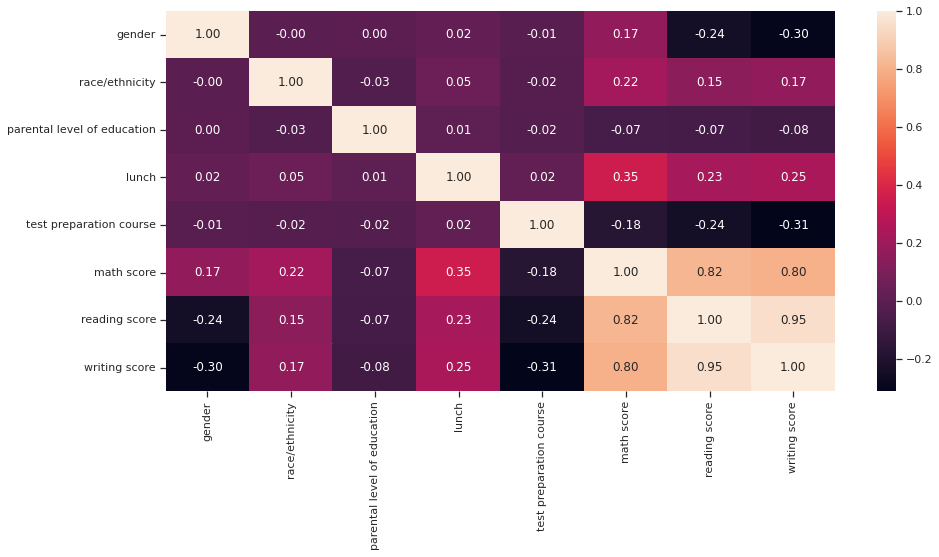

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

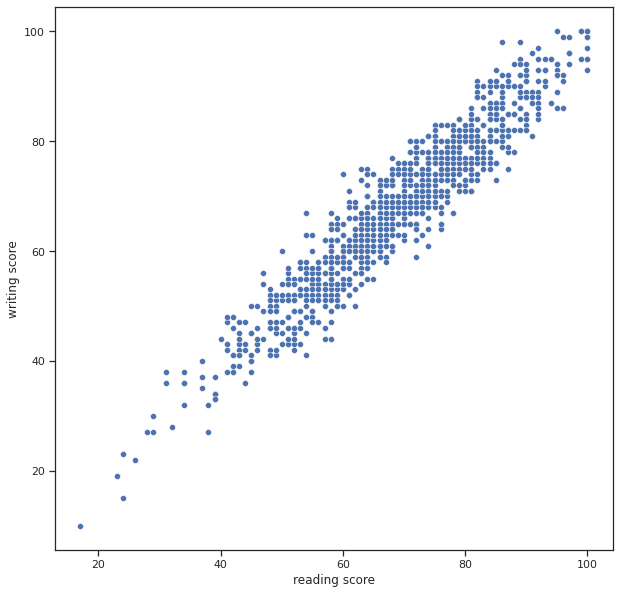

In [58]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='reading score', y='writing score', data=data)

Между признаками "reading score" и "writing score" прослеживается линейная зависимость (коэффициент корреляции = 0.95).

## Аналитическое вычисление коэффициентов регрессии

In [59]:
from typing import Dict, Tuple

In [60]:
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [61]:
x_array = data['reading score'].values
y_array = data['writing score'].values

Коэффициенты регрессии:

In [62]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(-0.6675536409329368, 0.9935311142409596)

Отрисовка зависимости:

In [63]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [64]:
regr_a = y_regr(x_array, b0, b1)

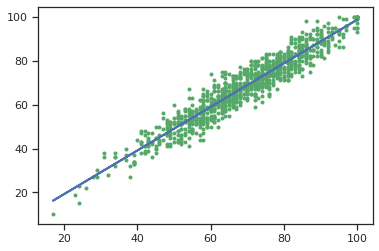

In [65]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, regr_a, 'b', linewidth=2.0)
plt.show()

## Метод наименьших квадратов

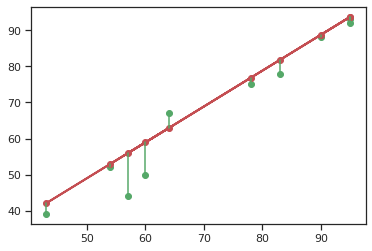

In [66]:
K_mnk=10

plt.plot(x_array[1:K_mnk+1], y_array[1:K_mnk+1], 'go')
plt.plot(x_array[1:K_mnk+1], regr_a[1:K_mnk+1], '-ro', linewidth=2.0)

for i in range(len(x_array[1:K_mnk+1])):
    x1 = x_array[1:K_mnk+1][i]
    y1 = y_array[1:K_mnk+1][i]
    y2 = regr_a[1:K_mnk+1][i]
    plt.plot([x1,x1],[y1,y2],'g-')

plt.show()

## Подбор коэффициентов через LinearRegression

In [67]:
from sklearn.linear_model import LinearRegression

Коэффициенты, полученные с использованием LinearRegression:

In [68]:
regr1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, regr1.coef_), (b0, regr1.intercept_)

((0.9935311142409596, array([[0.99353111]])),
 (-0.6675536409329368, array([-0.66755364])))

Линейная модель:

In [69]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

## SVM модель

In [87]:
from sklearn.svm import SVR

In [91]:
regr2 = SVR(kernel='linear', C=1.0)
model2 = regr2.fit(X_train, y_train)

## Дерево решений

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

Построим модель дерева с глубиной = 3:

In [94]:
regr3 = DecisionTreeRegressor(max_depth=3)
model3 = regr3.fit(X_train, y_train)

Выведем основную статистику для дерева:

In [95]:
stat_tree(model3)

Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0


И с глубиной = 5:

In [96]:
regr4 = DecisionTreeRegressor(max_depth=5)
model4 = regr4.fit(X_train, y_train)

In [97]:
stat_tree(model4)

Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0


## Оценка качества моделей с помощью двух метрик. Сравнение качества

Оценивать качество регрессии будем при помощи двух метрик - средней абсолютной ошибки (Mean Absolute Error) и медианной абсолютной ошибки (Median Absolute Error):

In [110]:
from sklearn.metrics import mean_absolute_error, median_absolute_error 

In [111]:
err1 = []
err2 = []

In [112]:
def rate_model(model):
    print("Средняя абсолютная ошибка:",
          mean_absolute_error(y_test, model.predict(X_test)))
    err1.append(mean_absolute_error(y_test, model.predict(X_test)))
    print("Медианная абсолютная ошибка:",
          median_absolute_error(y_test, model.predict(X_test)))
    err2.append(median_absolute_error(y_test, model.predict(X_test)))

In [113]:
rate_model(model1)

Средняя абсолютная ошибка: 4.867217739956687e-15
Медианная абсолютная ошибка: 0.0


In [114]:
rate_model(model2)

Средняя абсолютная ошибка: 0.03480281770536795
Медианная абсолютная ошибка: 0.0313226906224493


In [115]:
rate_model(model3)

Средняя абсолютная ошибка: 2.271458042303731
Медианная абсолютная ошибка: 2.1506069285324614


In [116]:
rate_model(model4)

Средняя абсолютная ошибка: 0.5718074060780459
Медианная абсолютная ошибка: 0.5


Самая лучшая по качеству по обоим метрикам - первая модель, полученная при помощи LinearRegression, а худшая - полученная с помощью дерева решений с глубиной 3.

Визуальное представление оценки:


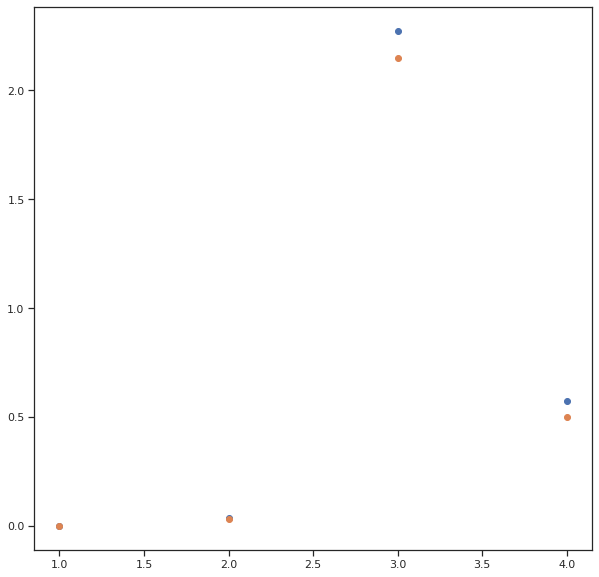

In [117]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter([1, 2, 3, 4], err1)
plt.scatter([1, 2, 3, 4], err2)

## График важности признаков в дереве решений

Вычисление важности признаков основано на том, какое количество раз признак встречается в условиях дерева:

In [118]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

Проверим для модели с глубиной = 3:

In [119]:
list(zip(data.columns.values, model3.feature_importances_))

[('gender', 0.0),
 ('race/ethnicity', 0.0),
 ('parental level of education', 0.0),
 ('lunch', 0.0),
 ('test preparation course', 0.0),
 ('math score', 0.0),
 ('reading score', 0.0),
 ('writing score', 1.0)]

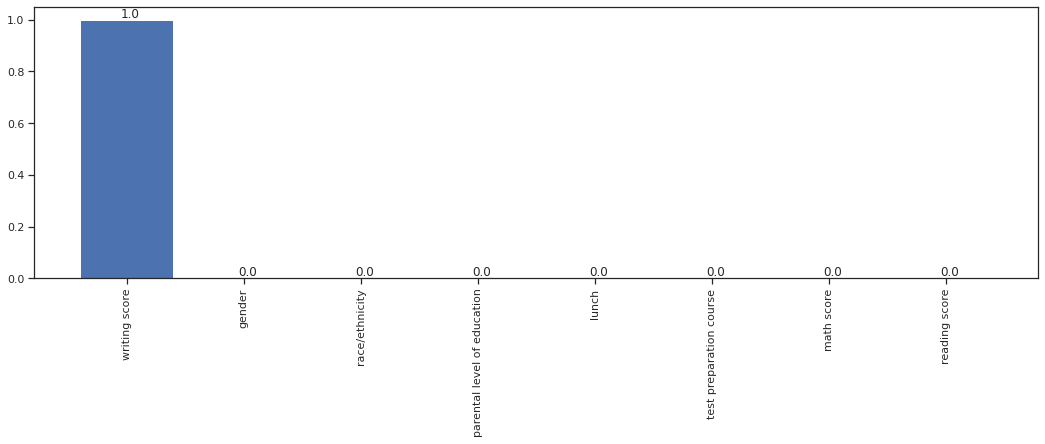

In [120]:
stud_tree_cl_fl_1, stud_tree_cl_fd_1 = draw_feature_importances(model3, data)

И для модели с глубиной = 5:

In [122]:
list(zip(data.columns.values, model4.feature_importances_))

[('gender', 0.0),
 ('race/ethnicity', 0.0),
 ('parental level of education', 0.0),
 ('lunch', 0.0),
 ('test preparation course', 0.0),
 ('math score', 0.0),
 ('reading score', 0.0019008910115964283),
 ('writing score', 0.9980991089884036)]

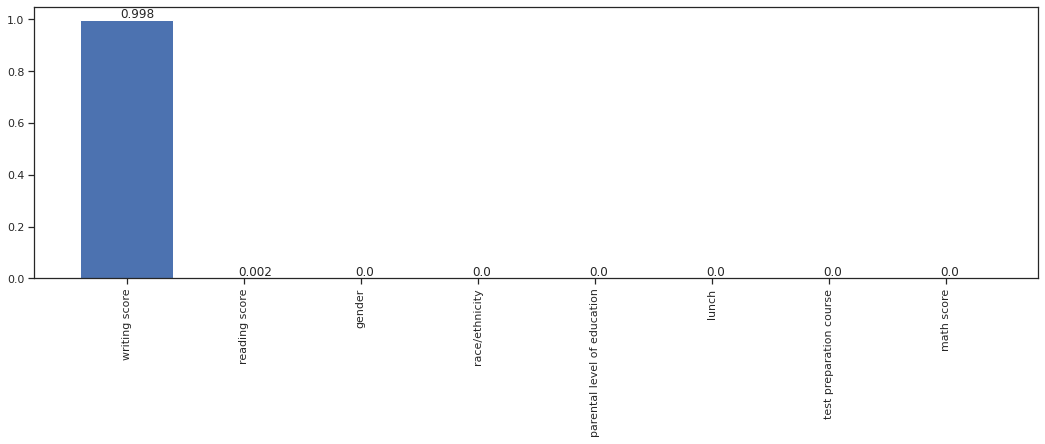

In [123]:
stud_tree_cl_fl_2, syud_tree_cl_fd_ = draw_feature_importances(model4, data)

## Вывод правил дерева

Выведем правила для дерева с глубиной = 3:

In [124]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model3, feature_names=list(data.columns))
HTML('<pre>' + tree_rules + '</pre>')

И для дерева с глубиной = 5:

In [125]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model4, feature_names=list(data.columns))
HTML('<pre>' + tree_rules + '</pre>')